In [3]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv(r"C:\weather\reviews.csv")

In [5]:
df.head(20)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,09-07-2022 15:00,"Great music service, the audio is high quality...",5,2,NaN
1,09-07-2022 14:21,Please ignore previous negative rating. This a...,5,1,NaN
2,09-07-2022 13:27,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,09-07-2022 13:26,Really buggy and terrible to use as of recently,1,1,NaN
4,09-07-2022 13:20,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
5,09-07-2022 13:20,The player controls sometimes disappear for no...,3,7,NaN
6,09-07-2022 13:19,I love the selection and the lyrics are provid...,5,0,NaN
7,09-07-2022 13:17,Still extremely slow when changing storage to ...,3,16,NaN
8,09-07-2022 13:16,It's a great app and the best mp3 music app I ...,5,0,NaN
9,09-07-2022 13:11,"I'm deleting this app, for the following reaso...",1,318,NaN


In [6]:
review_df = df[['Review','Rating']]

print(review_df.shape)
review_df.head(5)

(61594, 2)


,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [7]:
df.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

In [8]:
review_df = review_df[review_df['Rating'] != '0']

print(review_df.shape)
review_df.head(5)

(61594, 2)


,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [9]:
review_df["Rating"].value_counts()

5    22095
1    17653
4     7842
2     7118
3     6886
Name: Rating, dtype: int64

In [10]:
sentiment_label = review_df.Rating.factorize()
sentiment_label

(array([0, 0, 1, ..., 4, 4, 1], dtype=int64),
 Int64Index([5, 4, 1, 3, 2], dtype='int64'))

In [11]:
Emotion = review_df.Review.values

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(Emotion)

In [13]:
encoded_docs = tokenizer.texts_to_sequences(Emotion)

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
vocab_size = len(Emotion)
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1971008   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,987,659
Trainable params: 1,987,659
Non-trainable params: 0
______________________________________________

In [16]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
1540/1540 [==============================] - 242s 155ms/step - loss: -21.8463 - accuracy: 0.1254 - val_loss: -36.9144 - val_accuracy: 0.1354
Epoch 2/5
1540/1540 [==============================] - 230s 149ms/step - loss: -57.6458 - accuracy: 0.1253 - val_loss: -69.2237 - val_accuracy: 0.1354
Epoch 3/5
1540/1540 [==============================] - 232s 151ms/step - loss: -107.6791 - accuracy: 0.1601 - val_loss: -148.0037 - val_accuracy: 0.2581
Epoch 4/5
1540/1540 [==============================] - 232s 151ms/step - loss: -193.5454 - accuracy: 0.2734 - val_loss: -212.5587 - val_accuracy: 0.2892
Epoch 5/5
1540/1540 [==============================] - 232s 151ms/step - loss: -258.4814 - accuracy: 0.2967 - val_loss: -268.2588 - val_accuracy: 0.3296


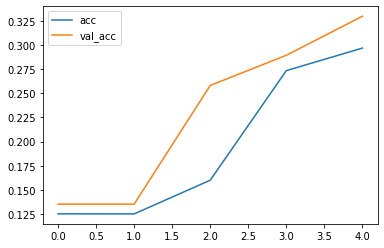

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

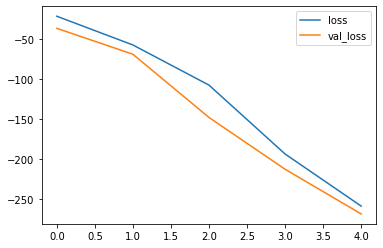

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")